In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\electricity.csv")

# Encode the target variable
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])  # UP -> 1, DOWN -> 0

# Encode categorical data (e.g., the day column)
data['day'] = le.fit_transform(data['day'])

# Separate features (X) and target (y)
X = data[['date', 'day', 'period', 'nswprice', 'nswdemand', 'vicprice', 'vicdemand', 'transfer']].values
y = data['class'].values

# Ensure all feature data is numeric
X = X.astype('float32')


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\dell\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\dell\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\dell\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File "C:\Users\dell\anaconda3\Lib\site-packages

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [2]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


AttributeError: module 'ml_dtypes' has no attribute 'float8_e3m4'
Epoch 1/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6119 - loss: 0.6566 - val_accuracy: 0.7015 - val_loss: 0.5746
Epoch 2/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7092 - loss: 0.5618 - val_accuracy: 0.7434 - val_loss: 0.5355
Epoch 3/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7408 - loss: 0.5263 - val_accuracy: 0.7586 - val_loss: 0.5092
Epoch 4/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7590 - loss: 0.5046 - val_accuracy: 0.7622 - val_loss: 0.5003
Epoch 5/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.7637 - loss: 0.4967 - val_accuracy: 0.7633 - val_loss: 0.5004
Epoch 6/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.7630 - loss: 0.4977 - val_accuracy: 0.7589 - val_loss: 0.5009
Epoch 7/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.7690 - loss: 0.4889 - val_accuracy: 0.7658 - val_loss: 0.4895
Epoch 8/20
102

C:\Users\dell\AppData\Local\Temp\ipykernel_10000\3525651061.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Score', y='Metric', data=df_metrics, palette='viridis')


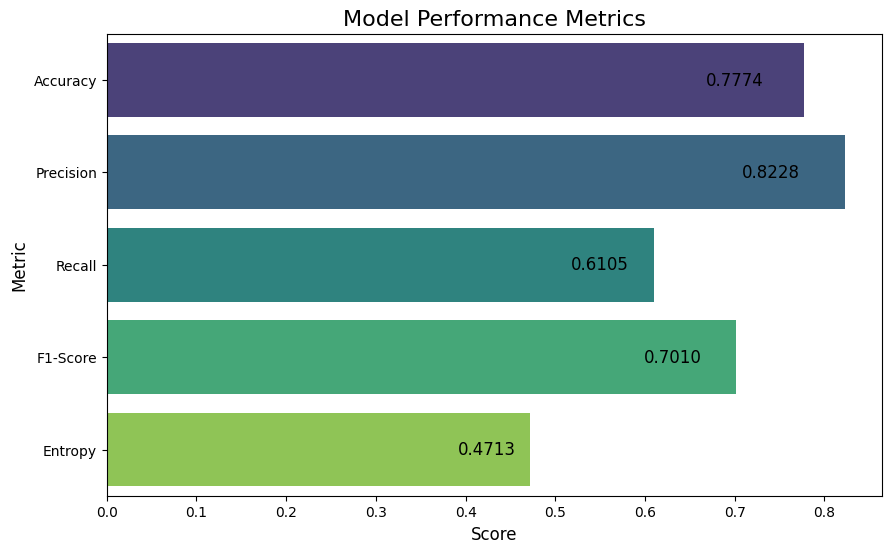

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, log_loss
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns

# Create the model
model = Sequential([
    Dense(16, activation='relu', input_dim=X.shape[1]),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate performance
loss, accuracy = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)  # Binary classification with 0.5 threshold

# Metrics
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
entropy = log_loss(y_test, y_pred)

# Present results in a table
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Entropy': entropy
}

# Create the DataFrame
metrics_df = pd.DataFrame(metrics, index=[0])

# Performance Report
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")
print("\nModel Performance Metrics:")
print(metrics_df)

# Data for performance metrics
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Entropy'],
    'Score': [accuracy, precision, recall, f1, entropy]
}

# Create a DataFrame
df_metrics = pd.DataFrame(metrics)

# Plot the metrics
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Score', y='Metric', data=df_metrics, palette='viridis')

# Title and labels
plt.title('Model Performance Metrics', fontsize=16)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Metric', fontsize=12)

# Add metric values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_width():.4f}',
                (p.get_x() + p.get_width() * 0.9, p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=12, color='black')

# Show the plot
plt.show()

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5922 - loss: 0.6629 - val_accuracy: 0.6748 - val_loss: 0.5949
Epoch 2/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.7035 - loss: 0.5741 - val_accuracy: 0.7338 - val_loss: 0.5480
Epoch 3/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.7469 - loss: 0.5320 - val_accuracy: 0.7476 - val_loss: 0.5214
Epoch 4/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.7563 - loss: 0.5137 - val_accuracy: 0.7545 - val_loss: 0.5130
Epoch 5/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.7607 - loss: 0.5065 - val_accuracy: 0.7594 - val_loss: 0.5075
Epoch 6/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.7557 - loss: 0.5082 - val_accuracy: 0.7572 - val_loss: 0.5093
Epoch 7/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.7627 - loss: 0.4992 - val_accuracy: 0.7589 - val_loss: 0.5041
Epoch 8/20
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.7629 -

C:\Users\dell\AppData\Local\Temp\ipykernel_10000\2172406282.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Score', y='Metric', data=metrics_df, palette='viridis')


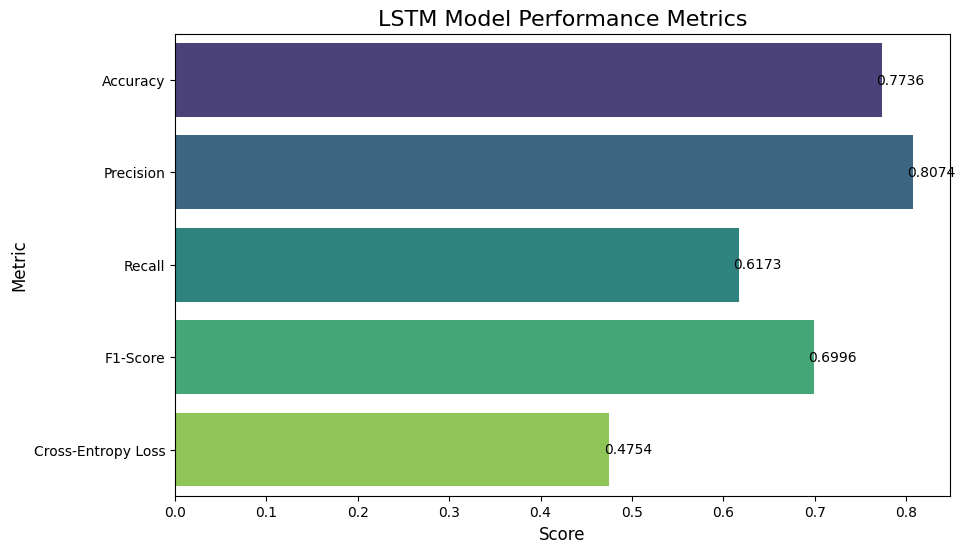

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data = pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\electricity.csv")

# Preprocessing
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])  # Encode the target variable (UP -> 1, DOWN -> 0)

# Encode the categorical 'day' column
data['day'] = le.fit_transform(data['day'])

# Feature scaling
scaler = MinMaxScaler()
numerical_cols = ['date', 'day', 'period', 'nswprice', 'nswdemand', 'vicprice', 'vicdemand', 'transfer']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])  # Normalize numerical features to [0, 1]

# Prepare data for LSTM
X = data[numerical_cols].values
y = data['class'].values
X = X.reshape(X.shape[0], 1, X.shape[1])  # Reshape for LSTM input (samples, timesteps, features)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))  # Use sigmoid activation for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary classes

# Calculate additional metrics
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
entropy = log_loss(y_test, y_pred)

# Present metrics
print(f"Test Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Cross-Entropy Loss: {entropy}")

# Create a DataFrame for the metrics
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Cross-Entropy Loss'],
    'Score': [accuracy, precision, recall, f1, entropy]
}
metrics_df = pd.DataFrame(metrics)

# Plot the metrics
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Score', y='Metric', data=metrics_df, palette='viridis')

# Add metric values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_width():.4f}',
                (p.get_width() + 0.02, p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=10, color='black')

# Customize the plot
plt.title('LSTM Model Performance Metrics', fontsize=16)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Metric', fontsize=12)
plt.show()